In [1]:
import cv2
import numpy as np  
import os
import matplotlib.pyplot as plt
import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

In [2]:
img_folder = "./image/edof/10x_40deg_step20um/"
result_folder = "./image/edof/result"

# 결과 이미지 저장 폴더 없으면 생성
if not os.path.exists(result_folder):
    os.makedirs(result_folder)

# 이미지 폴더에서 파일 목록 가져오기
file_list = os.listdir(img_folder)
img_name_list = [file for file in file_list if file.endswith('.png')]
# 파일이름들 시간 순으로 정리
sorted_img_name_list = sorted(img_name_list, key=lambda x: os.path.getmtime(os.path.join(img_folder, x)))

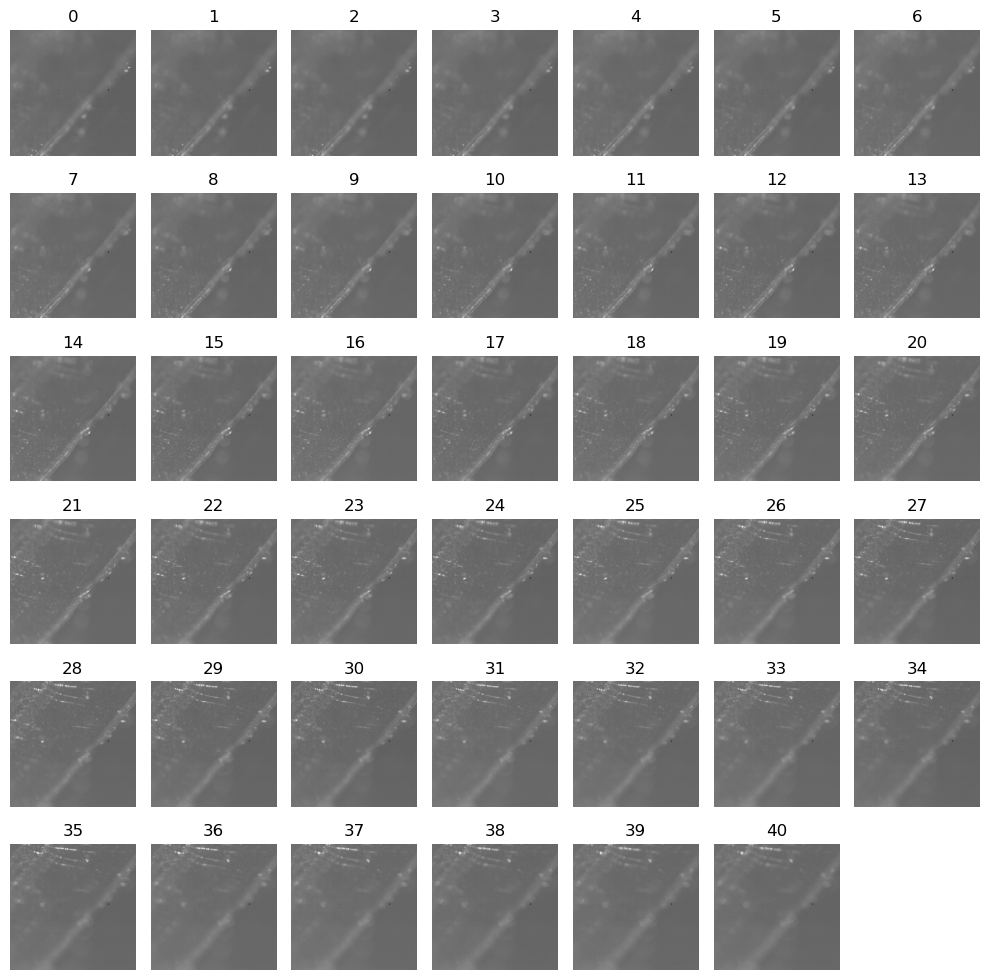

In [3]:
fig = plt.figure(figsize=(10,10))

for i,img_name in enumerate(sorted_img_name_list):
    ax = fig.add_subplot(6, 7, i + 1)
    img_path = os.path.join(img_folder, sorted_img_name_list[i])
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_gray = img_gray[1000-24:,800-24:-200]
    ax.imshow(img_gray, cmap='gray')
    ax.set_title(i)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [6]:
print(pywt.wavelist(kind='continuous'))

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


In [8]:
img_stack = []

for i,img_name in enumerate(sorted_img_name_list):
    img_path = os.path.join(img_folder, sorted_img_name_list[i])
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_gray = img_gray[1000-24:,800-24:-200]
    if img_gray is not None:
        img_stack.append(img_gray)

print(len(img_stack))
print(img_stack[0].shape)
print(type(img_stack[0]))

41
(1024, 1024)
<class 'numpy.ndarray'>


In [ ]:
# # 사이즈 조절된 이미지 저장
# if not os.path.exists('./image/edof/10x_40deg_step20um/image_sized'):
#     os.makedirs('./image/edof/10x_40deg_step20um/image_sized')

# for i, image in enumerate(img_stack):
#     file_name = f'./image/edof/10x_40deg_step20um/image_sized/image_{i+1}.bmp'
#     cv2.imwrite(file_name,image)

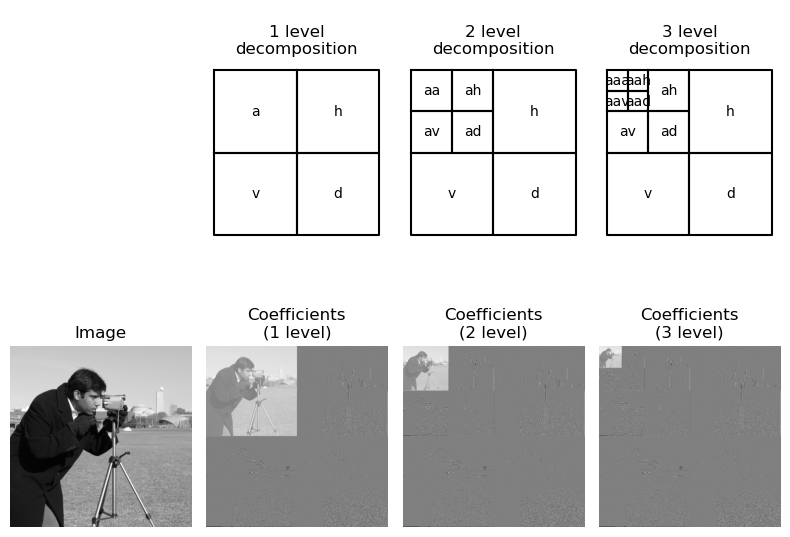

In [9]:
# Wavelet transform template code
x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[8, 6])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

/Users/arlee/miniconda3/envs/opencv/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


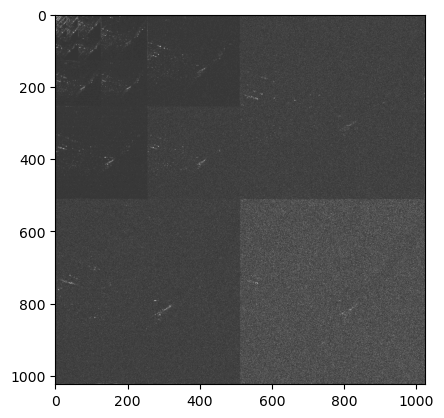

In [10]:
img = img_stack[20]
shape = img.shape

maxLevel = 10 # how many levels of decomposition to draw

coeffs = pywt.wavedec2(img, 'db3', mode='periodization', level=maxLevel)
# coeffsArr, slices = pywt.coeffs_to_array(coeffs)

# normalize each coefficient array independently for better visibility
coeffs[0] /= np.abs(coeffs[0]).max()
for detailLevel in range(maxLevel):
    coeffs[detailLevel + 1] = [d/np.abs(d).max() for d in coeffs[detailLevel + 1]]

coeffsArr, slices = pywt.coeffs_to_array(coeffs)
coeffsArrAbs = np.abs(coeffsArr)

plt.imshow(coeffsArrAbs+0.2, cmap=plt.cm.gray, vmin=0, vmax=1)
# plt.imshow(coeffsArrAbs, cmap=plt.cm.gray)
# # LL, (LH, HL, HH) 
# aa, (ah, av, ad), (h, v, d) = coeffs
# aa.max()

In [12]:
coeffsArr.shape

(1024, 1024)

In [13]:
def create_edof_image(img_stack, num_levels, wavelet, padding_mode):
    # wavelet transform coefficient 저장 리스트 생성 및 초기화
    coeffs_list = []
    # wavelet transform absolute coefficient 저장 리스트 생성 및 초기화
    coeffs_abs_list = []

    # img_stack에 wavelet transform 적용
    for img in img_stack:
        coeffs = pywt.wavedec2(img, wavelet, level=num_levels, mode=padding_mode)
        coeffs_arr, slices = pywt.coeffs_to_array(coeffs)
        coeffs_abs_arr = np.abs(coeffs_arr)
        coeffs_list.append(coeffs_arr)
        coeffs_abs_list.append(coeffs_abs_arr)

    coeffs_abs_list_arr = np.array(coeffs_abs_list)
    # coeff. stack에서 최대값 index arr 생성
    max_coeffs_index_arr = np.argmax(coeffs_abs_list_arr, axis=0)

    # 최대 coeff. 저장 배열 초기화
    max_coeffs_shape = coeffs_list[0].shape # 첫 번째 이미지 기준으로 계수 형태 지정
    max_coeffs_arr = np.empty(max_coeffs_shape)

    # 각 인덱스를 반복하면서 coeffs_list에서 해당하는 최대값 추출
    for i in range(max_coeffs_shape[0]):
        for j in range(max_coeffs_shape[1]):
            index = max_coeffs_index_arr[i][j]
            max_coeffs_arr[i][j] = coeffs_list[index][i][j]

    # max_coeffs_arr를 wavelet 계수 시퀀스로 변환
    max_coeffs = pywt.array_to_coeffs(max_coeffs_arr, coeff_slices=slices, output_format='wavedec2')

    # 역 웨이블릿 변환으로 이미지 재구성
    result_image = pywt.waverec2(max_coeffs, wavelet, mode=padding_mode)

    return result_image

In [14]:
img_stack = []

for i,img_name in enumerate(sorted_img_name_list):
    img_path = os.path.join(img_folder, sorted_img_name_list[i])
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_gray = img_gray[1000-24:,800-24:-200]
    if img_gray is not None:
        img_stack.append(img_gray)

Text(0.5, 1.0, '10/db3/periodization')

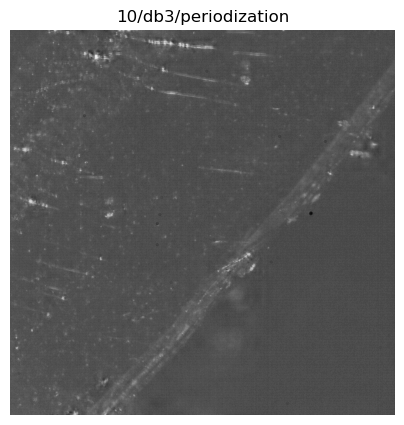

In [16]:
max_levels = 10
wavelet = 'db3'
padding_mode = 'periodization'
edof_image = create_edof_image(img_stack, max_levels, wavelet, padding_mode)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(edof_image, cmap='gray')
plt.title(f"{max_levels}/{wavelet}/{padding_mode}")

Text(0.5, 1.0, '10/sym5/periodization')

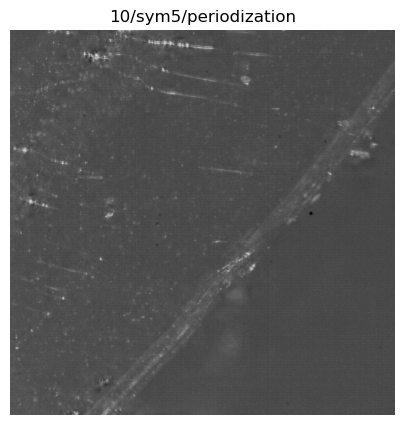

In [18]:
max_levels = 10
wavelet = 'sym5'
padding_mode = 'periodization'
edof_image = create_edof_image(img_stack, max_levels, wavelet, padding_mode)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(edof_image, cmap='gray')
plt.title(f"{max_levels}/{wavelet}/{padding_mode}")

Text(0.5, 1.0, '10/bior2.2/periodization')

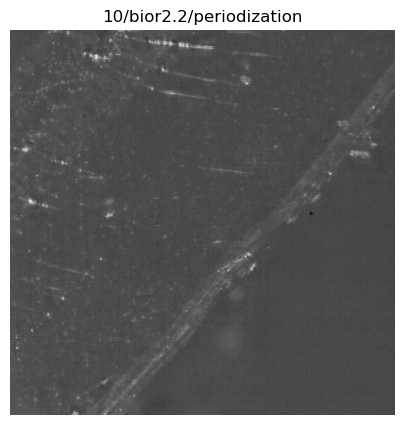

In [19]:
max_levels = 10
wavelet = 'bior2.2'
padding_mode = 'periodization'
edof_image = create_edof_image(img_stack, max_levels, wavelet, padding_mode)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(edof_image, cmap='gray')
plt.title(f"{max_levels}/{wavelet}/{padding_mode}")

_

In [37]:
def sub_band_consistency_check(map, coeff):
    nx = coeff.shape[0]
    ny = coeff.shape[1]

    for i in range(3):
        j = 1
        for k in range(i):
            j *= 2

        mx = nx // j
        my = ny // j

        for x in range(mx // 2, mx):
            for y in range(my // 2):
                a = map[x, y]
                b = map[x, y + my // 2]
                c = map[x - mx // 2, y + my // 2]

                if a == b:
                    if a != c:
                        map[x - mx // 2, y + my // 2] = a
                else:
                    if a == c:
                        map[x , y + my // 2] = a
                    elif b == c:
                        map[x ,y] = b
                    else:
                        va = abs(coeff[x,y])
                        vb = abs(coeff[x,y + my//2])
                        vc= abs(coeff[x-mx//2,y+my//2])

                        if va > vb and va > vc :
                            map[x - mx//2,y+my//j]=a 
                            map[x ,y+my//j]=a 
                        elif vb > va and vb > vc :
                            map [x-mx//j,y+my//j]=b 
                            map [x,y]=b 
                        elif vc>va and vc>vb :
                            map [x-mx//j ,y+my//j]=c 
                            map [x ,y]=c  


In [53]:
def combine_focus_stack(imgStack, numLevel):
    # 초기화: 결과 이미지 생성 및 모든 픽셀을 0으로 설정
    result = np.zeros_like(imgStack[0], dtype=np.float32)
    maxCoeff = np.zeros_like(result)

    # imgStack 내의 모든 이미지에서 해당 위치의 픽셀 값 비교
    for k in range(len(imgStack)):
        # 다중 레벨 웨이블릿 변환 적용 (예시: 'haar')
        coeffs = pywt.wavedec2(imgStack[k], 'haar', level=numLevel)
        
        for level in range(1, numLevel + 1):
            # LL(저주파 영역) 세부 계수 추출 및 절대값 적용 (웨이블릿 세부 계수는 음수일 수 있음)
            LL_abs = np.abs(coeffs[level][0])

            for i in range(result.shape[0]):
                for j in range(result.shape[1]):
                    if i < LL_abs.shape[0] and j < LL_abs.shape[1]:
                        if LL_abs[i, j] > maxCoeff[i, j]:
                            maxCoeff[i, j] = LL_abs[i, j]
                            result[i, j] = imgStack[k][i, j]

    return result.astype(np.uint8)

def decompose_image(result, num_levels):
    # 초기화: 결과 이미지 크기에 맞는 배열 생성 및 모든 계수를 0으로 설정
    coeffs = [np.zeros_like(result)]

    # 다중 레벨 웨이블릿 계수 생성
    for level in range(1, num_levels + 1):
        coeffs.append((coeffs[level - 1], None))

    # 역 웨이블릿 변환 적용 (예시: 'haar')
    reconstructed = pywt.waverec2(coeffs, 'haar')

    return reconstructed.astype(np.uint8)
